In [2]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from scipy.ndimage.morphology import binary_opening as bo
from scipy.ndimage.morphology import binary_erosion as be
from scipy.ndimage.morphology import binary_closing as bc
from scipy.ndimage.morphology import binary_fill_holes as bfh

from ipywidgets import interact, fixed
from IPython.display import display
import skimage

import os
os.chdir('/Volumes/FAIR/DC-Image-Analysis/DC-project-master/cleancode/NewMidplane')
import Functions
from scipy.ndimage.interpolation import rotate


def saveImage(array,img):
    array = np.swapaxes(array,0,2)
    mask = sitk.GetImageFromArray(array)
    mask.CopyInformation(img)
    sitk.WriteImage(mask, os.path.split(path)[0] + '/ROI.nii.gz')


%matplotlib inline
# Calculate parameters low and high from window and level
os.chdir('/Volumes/FAIR/DC-Image-Analysis/python tutorials')


import image_viewer
from image_viewer import BiggestRegion,display_image
    
axis_pair8,axis_pair6,axis_pair4,axis_pair0 = [],[],[],[]
area8,area6,area4,area0 =  [],[],[],[]
maxMPS_list, centroidMPS_list,centroid_Brain = [], [],[]
vec1_list, vec2_list = [], []
volume = []
ID = []
Lesion_centroids = []
reference_x_list = []
volume = []


Reading directory: /Volumes/FAIR/Registered_MPS3/MPS7
b'MPS7' 0.997539220584 0.0626806797258 -0.0314107590781 121.68873511 /Volumes/FAIR/Registered_MPS3/MPS7
number of MPS points: 243


/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:230: RuntimeWarning: invalid value encountered in greater
/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:230: RuntimeWarning: invalid value encountered in less
/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:236: RuntimeWarning: invalid value encountered in less


Midplane shift to the left hemisphere
Average MPS length: nan 
Max MPS deviation: 12.5 
MPS_volume: 47748.2742857


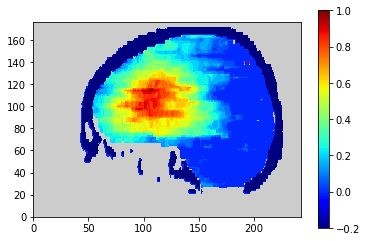

/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:309: RuntimeWarning: invalid value encountered in greater
/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:313: RuntimeWarning: invalid value encountered in greater
/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:317: RuntimeWarning: invalid value encountered in greater
/anaconda/envs/mic3/lib/python3.6/site-packages/ipykernel_launcher.py:321: RuntimeWarning: invalid value encountered in greater


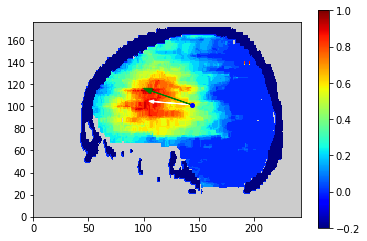

In [3]:
paths = ['/Volumes/FAIR/Registered_MPS3/MPS1',
         '/Volumes/FAIR/Registered_MPS3/MPS2',
         '/Volumes/FAIR/Registered_MPS3/MPS3',
         '/Volumes/FAIR/Registered_MPS3/MPS4',
         '/Volumes/FAIR/Registered_MPS3/MPS5',
         '/Volumes/FAIR/Registered_MPS3/MPS6',
         '/Volumes/FAIR/Registered_MPS3/MPS7',
         '/Volumes/FAIR/Registered_MPS3/MPS8',
         '/Volumes/FAIR/Registered_MPS3/MPS9',
         '/Volumes/FAIR/Registered_MPS3/MPS10',
         '/Volumes/FAIR/Registered_MPS3/MPS11',
         '/Volumes/FAIR/Registered_MPS3/MPS12',
         '/Volumes/FAIR/Registered_MPS3/MPS13',
         '/Volumes/FAIR/Registered_MPS3/MPS14',
         '/Volumes/FAIR/Registered_MPS3/SDH4',
         '/Volumes/FAIR/Registered_MPS3/SDH7',
         '/Volumes/FAIR/Registered_MPS3/SDH8',
         '/Volumes/FAIR/Registered_MPS3/SDH11',
         '/Volumes/FAIR/Registered_MPS3/SDH12',
         '/Volumes/FAIR/Registered_MPS3/SDH14',
         '/Volumes/FAIR/Registered_MPS3/SDH16-2',
         '/Volumes/FAIR/Registered_MPS3/SDH24',
         '/Volumes/FAIR/Registered_MPS3/CONT5',
         '/Volumes/FAIR/Registered_MPS3/CONT7',
         '/Volumes/FAIR/Registered_MPS3/EDH7',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Pre',
         '/Volumes/FAIR/Registered_MPS3/Sample3_Post',
         '/Volumes/FAIR/Registered_MPS3/Sample4_Pre',
         '/Volumes/FAIR/Registered_MPS3/tutorial3',
         '/Volumes/FAIR/Registered_MPS3/ScanD',
         '/Volumes/FAIR/Registered_MPS3/ScanE',
         '/Volumes/FAIR/Registered_MPS3/ScanF',
         '/Volumes/FAIR/Registered_MPS3/ScanH',
        ]

# for m in range(len(paths)):
for m in range(6,7):
    path = paths[m]
    print( "Reading directory:", path)
    mask = sitk.ReadImage(path + '/lesion.nii.gz')
    Mask_array = sitk.GetArrayFromImage(mask)
    Mask_array = np.swapaxes(Mask_array,0,2)
    ConstPixelSpacing = mask.GetSpacing()
    
    def reshape(array, ConstPixelSpacing):
        """ Reshape array to have cubic voxels of size 1mm^3 """
        '''mind the a, b, c value is adjusted to make each '''

        width = array.shape[0]
        height = array.shape[1]
        depth = array.shape[2]
        a = int((width)*ConstPixelSpacing[0])
        b = int((height)*ConstPixelSpacing[1])
        c = int((depth)*ConstPixelSpacing[2])
        reshapedArray1 = np.zeros((a,height,depth))
        xp = np.linspace(0, (width-1)*ConstPixelSpacing[0], width) #adjust xp as [0,1ConstPixelSpacing,2CPS..
        x  = np.linspace(0, a-1, a)

        for j in range(height):
            for k in range(depth):
                reshapedArray1[:,j,k] = np.interp(x, xp, array[:,j,k])
        reshapedArray2 = np.zeros((a,b,depth))
        yp = np.linspace(0,(height-1)*ConstPixelSpacing[1],height)
        y = np.linspace(0,b-1,b)
        for j in range(a):
            for k in range(depth):
                reshapedArray2[j,:,k] = np.interp(y, yp, reshapedArray1[j,:,k])
        reshapedArray3 = np.zeros((a,b,c))
        zp = np.linspace(0,(depth-1)*ConstPixelSpacing[2],depth)
        z = np.linspace(0,c-1,c)
        for j in range(a):
            for k in range(b):
                reshapedArray3[j,k,:] = np.interp(z, zp, reshapedArray2[j,k,:])
        return reshapedArray3

#     Read lesion array
    Lesion_array = np.zeros(Mask_array.shape)
    # Lesion_array[Mask_array==19] = 1
    Lesion_array[Mask_array==1] = 1
    Mask_array = Lesion_array
    np.nonzero(Mask_array)
    
    mp = sitk.ReadImage(path + '/MPS.nii.gz')
    mp_array = sitk.GetArrayFromImage(mp)
    mp_array = np.swapaxes(mp_array,0,2)
    ConstPixelSpacing = mp.GetSpacing()

    ml = sitk.ReadImage(path + '/Midplane_Q.nii.gz')
    ml_array = sitk.GetArrayFromImage(ml)
    ml_array = np.swapaxes(ml_array,0,2)

    sku = sitk.ReadImage(path + '/Skull_contour.nii.gz')
    sku_array = sitk.GetArrayFromImage(sku)
    sku_array = np.swapaxes(sku_array,0,2)

    if ConstPixelSpacing != (1,1,1):
        Reshaped_mp = reshape(mp_array,ConstPixelSpacing)
        Reshaped_ml = reshape(ml_array,ConstPixelSpacing)
        Reshaped_sku = reshape(sku_array,ConstPixelSpacing)
#         Reshaped_lesion = reshape(Lesion_array,ConstPixelSpacing)


    else:
        Reshaped_mp = mp_array
        Reshaped_ml = ml_array
        Reshaped_sku = sku_array
#         Reshaped_lesion = Lesion_array

    #Import ideal midplane parameters
    paras = np.load("/Volumes/FAIR/Registered_MPS3/MPS_para2.npy",encoding= 'bytes')


    # img_gauss = sitk.DiscreteGaussian(img, variance=1)
    # display_image(img_gauss,window=120, level=40)

    # paras = np.load('/Volumes/FAIR/DC-Image-Analysis/DC-project-master/cleancode/NewMidplane/Final_preop.npy')
    file, a, b, c, d = paras[m]
    a, b, c, d = a.astype(float),b.astype(float),c.astype(float),d.astype(float)
    v = np.array((a,b,c))
    v = v.astype(float)
    print(file, a, b, c, d, path)

    # midplane normal vector regulate the direction
    if a<0:
        a,b,c,d = a*-1,b*-1,c*-1,d*-1
    n = np.array((a,b,c))

    #define rotation axis in plane, in z direction correlates to skew angle
    from sympy import *
    import sympy
    x = sympy.symbols('x')
    x1 = solve(a*x + b*100 + c*0 - d, x)
    x2 = solve(a*x + b*100 + c*100 - d, x)
    k = np.array((x1[0]-x2[0],0,-100)).astype(float)
    # k = k/np.sqrt((k[0]**2 + k[1]**2 + k[2]**2))
    vk_unit = Functions.unit_vector(k)
    vk_unit

    ## Define rotation axis in y direction, correlating to the orientation angle
    x = sympy.symbols('x')
    x3 = solve(a*x + b*0.0 + c*100.0- d, x)
    x4 = solve(a*x + b*100.0 + c*100.0 - d, x)

    k2 = np.array((x3[0]-x4[0],-100.0,0.0)).astype(float)
    vk2_unit = Functions.unit_vector(k2)
    # the new_vk corresponds to the reshaped version of array, as displayed in ITK
    # new_vk = Functions.unit_vector(vk_unit*ConstPixelSpacing)
    vk2_unit

    #the orientation angle
    yaxis = np.array((0,1,0))
    angle_ori = Functions.ang(vk2_unit,yaxis)
    zaxis = np.array((0,0,1))
    # angle_skew = Functions.ang(new_vk,zaxis)
    angle_skew = Functions.ang(vk_unit,zaxis)

    # Convert to degrees
    # The skew angle 
    A_S = 180.0 - angle_skew/np.pi*180.0
    # The orientation angle
    A_O = 180.0 - angle_ori/np.pi*180.0

    if vk2_unit[0]*vk2_unit[1] < 0.0:
        A_O = -1*A_O

    if vk_unit[0]*vk_unit[2] < 0.0:
        A_S = -1*A_S


    # ML_array = array
    # ideal midplane
    Ideal_ML = np.multiply(Reshaped_ml >0.2, Reshaped_ml)
    # mask = active_mask

    from scipy.ndimage.interpolation import rotate
    r_ml = rotate(Ideal_ML,A_O,mode='constant',axes=(0,1))
    r2_ml = rotate(r_ml,A_S,mode='constant',axes=(0,2))

    r_mp = rotate(Reshaped_mp,A_O,mode='constant',axes=(0,1))
    r2_mp = rotate(r_mp,A_S,mode='constant',axes=(0,2))

    binary_mp = np.multiply(r2_mp,r2_mp > 0.1)

    r_sku = rotate(Reshaped_sku,A_O,mode='constant',axes=(0,1))
    r2_sku = rotate(r_sku,A_S,mode='constant',axes=(0,2))
    
    Binary_sku  = np.zeros(r2_sku.shape)
    Binary_sku[np.abs(r2_sku)>0.1] = -1

    # Check the spread range of x1 value should be very small
    # Calculate the reference_x coordinates
    Binary_mp = np.zeros(r2_ml.shape)
    Binary_mp[np.abs(r2_ml)>0.4]=1
    r2_IMLq = Binary_mp
    xr = np.nonzero(r2_IMLq)[0]
    counts = np.bincount(xr)
    reference_x = np.argmax(counts)

    Skull_Contour = Binary_sku[reference_x,:,:]


    Binary_mps = np.zeros(r2_mp.shape)
    Binary_mps[np.abs(r2_mp)>0.1]=1
    print('number of MPS points:',len(Binary_mps[0]))

    dis = np.nonzero(Binary_mps)
    MPS_metrix = np.ones(Binary_mps.shape[:2]) * 100
    MPS_metrix_normalized = np.zeros(Binary_mps.shape[:2])

    # max_dev = float(np.max(np.abs(dis[0]-reference_x)))

    coord_list = []
    dic = {}
    for i in range(len(dis[0])):
        if (dis[1][i],dis[2][i]) in coord_list:
            dic[(dis[1][i],dis[2][i])].append((dis[0][i]))
        else:
            coord_list.append((dis[1][i],dis[2][i]))
            dic[(dis[1][i],dis[2][i])] = [dis[0][i]]

# in dis, there might be overlapping coordinates in MPS plane due to the rotation effects
# get the mean value of those overlapping keys

    for i in coord_list:
        MPS_metrix[i] = np.mean(dic[i]) - reference_x

    MPS_metrix[MPS_metrix==100.] = np.nan
    # Deviation to the right is positive!
    # if np.sum(MPS_metrix>0) > np.sum(MPS_metrix<0):
    if np.sum(MPS_metrix[MPS_metrix>0]) > np.sum(np.abs(MPS_metrix[MPS_metrix<0])):
        print('inaccuracy:', np.min(MPS_metrix))
        MPS_metrix[MPS_metrix < 0] = 0.01
        print("Midplane shift to the right hemisphere")
    else:
        MPS_metrix = MPS_metrix * -1
        MPS_metrix[MPS_metrix < 0] = 0.01
        print("Midplane shift to the left hemisphere")

    MPS_metrix_normalized = MPS_metrix/np.nanmax(MPS_metrix)
    print('Average MPS length:', np.mean(MPS_metrix),'\n'
         'Max MPS deviation:', np.nanmax(MPS_metrix),'\n'
         'MPS_volume:', np.nansum(MPS_metrix)
         )

    # MPS_metrix[MPS_metrix==0.] = np.nan
    # MPS_metrix_normalized[MPS_metrix_normalized==0.] = np.nan

    import scipy
    # ww[ww==0] = np.nan
    ww = scipy.ndimage.filters.gaussian_filter(MPS_metrix_normalized,1)
    # ww[ww==0] = np.nan

    Skull_Contour[np.nonzero(Skull_Contour)] = -0.2
    mps_contour = MPS_metrix_normalized.copy()
    y,z = np.nonzero(Skull_Contour)
    for i in range(len(z)):
        mps_contour[y[i]-1,z[i]-1]= Skull_Contour[y[i]-1,z[i]-1]

#     %matplotlib nbagg
    fig, ax = plt.subplots()
    # lesion_contour[lesion_contour==0]=np.nan
    palette = plt.cm.jet
    palette.set_bad(alpha=0.2)
    heatmap = ax.imshow(mps_contour.transpose(), cmap=palette)
    # heatmap = ax.imshow(ww.transpose(), cmap=palette)
    # heatmap = ax.imshow(MPS_metrix_normalized.transpose())

    plt.ylim(0, Skull_Contour.shape[1])
    plt.xlim (0,Skull_Contour.shape[0])
    # ax.set_aspect(ConstPixelSpacing[2]/ConstPixelSpacing[1])
    plt.colorbar(heatmap)
    plt.show()

    os.chdir(path)
    plt.savefig('mps_contour.png')

    from skimage import filters
    import scipy.ndimage as ndi
    from skimage.segmentation import find_boundaries as boundaries
    import skimage

    def region_parameter(region):
        #     Output the region parameters including centroid coordinate, 
        #     region area, length of major and minor axis
        labels = skimage.measure.label(region, connectivity=1)
        props = skimage.measure.regionprops(labels)
        v = [p.area for p in props]
        ind = np.argsort(v)
        # # From first to fourth biggest region
        #   determine whether the regions are connected or not
        n_regions = len(v)
        vcoords = props[ind[-1]].coords
        Area = v[ind[-1]]
        V_centroid = props[ind[-1]].centroid

        # The length of the major axis of the ellipse that has the same 
        # normalized second central moments as the region
        axis_major = props[ind[-1]].major_axis_length
        axis_minor = props[ind[-1]].minor_axis_length
        return n_regions,Area,V_centroid,axis_major,axis_minor

    def average(xs):
        N = float(len(xs))
        return tuple(sum(col)/N for col in zip(*xs))

    MPS = MPS_metrix_normalized
    # Region of relative MPS greater than 0.6
    region06 = np.zeros(MPS.shape)
    region06[MPS>0.6] = 1

    # Region of relative MPS greater than 0
    region0 = np.zeros(MPS.shape)
    region0[MPS>0] = 1

    # Region of relative MPS greater than 0.8
    region08 = np.zeros(MPS.shape)
    region08[MPS>0.8] = 1

    # Region of relative MPS greater than 0.8
    region04 = np.zeros(MPS.shape)
    region04[MPS>0.4] = 1

    n,Area0,Centroid0,axis_major0,axis_minor0 = region_parameter(region0)
    n,Area4,Centroid4,axis_major4,axis_minor4 = region_parameter(region04)
    n,Area6,Centroid6,axis_major6,axis_minor6 = region_parameter(region06)
    n,Area8,Centroid8,axis_major8,axis_minor8 = region_parameter(region08)

    maxMPS = np.where(ww==np.nanmax(ww))[0][0],np.where(ww==np.nanmax(ww))[1][0]



    # Vectors pointing from centroid of brain to centroid of cross plane deviation
    mps_centroid = average([Centroid4,Centroid6,Centroid8])

    vec1 = np.subtract(mps_centroid,Centroid0)
    # vec1 pointing tawards the centroid of midplane deviation
    vec2 = np.subtract(maxMPS,Centroid0)
    # vec2 pointing towards the max MPS deviation point


    import matplotlib
    x,y = Centroid0
    dx,dy = vec1
    wx,wy = vec2

#     matplotlib.pyplot.arrow(x, y, dx, dy,head_width=4,color = 'orange')

#     %matplotlib nbagg
    fig, ax = plt.subplots()
    palette = plt.cm.jet
    palette.set_bad(alpha=0.2)
    Skull_Contour[Skull_Contour==0]= np.nan
    heatmap = ax.imshow(mps_contour.transpose(), cmap=palette)
    # matplotlib.pyplot.arrow(x, y, dx, dy,head_width=4)
    # matplotlib.pyplot.arrow(x, y, dx, dy,head_width=4)

    matplotlib.pyplot.arrow(x, y, dx, dy,head_width=3,color = 'white')
    # white towards centroid of MPS deviation
    # green towards max MPS point
    matplotlib.pyplot.arrow(x, y, wx, wy,head_width=5,color = 'green')


    plt.plot([x], [y], marker='o', markersize=4, color="blue")

    # heatmap = ax.imshow(lesion_contour.transpose(), cmap=palette)
    # heatmap = ax.pcolor(brain_diff==0, cmap=plt.cm.winter)
    plt.ylim(0, Skull_Contour.shape[1])
    plt.xlim (0,Skull_Contour.shape[0])
    # ax.set_aspect(ConstPixelSpacing[2]/ConstPixelSpacing[1])
    plt.colorbar(heatmap)
    plt.show()
    os.chdir(path)
    plt.savefig('mps_vecs.png')

    volume.append((np.nansum(MPS_metrix)))
    vec1_list.append((vec1))
    vec2_list.append((vec2))
    centroid_Brain.append((Centroid0))
    centroidMPS_list.append((mps_centroid))
    maxMPS_list.append((maxMPS))
    area8.append((Area8))
    area6.append((Area6))
    area4.append((Area4))
    area0.append((Area0))

    axis_pair8.append((axis_major8,axis_minor8))
    axis_pair6.append((axis_major6,axis_minor6))
    axis_pair4.append((axis_major4,axis_minor4))
    axis_pair0.append((axis_major0,axis_minor0))

    output = {'Area80%': area8, 'Area60%': area6,'Area40%':area4, 'Area_crossbrain':area0,
             'axis_80%':axis_pair8,'axis_60%':axis_pair6,'axis_40%':axis_pair4,'axis_0%':axis_pair0,
              'maxMPS_coord':maxMPS_list, 'centroidMPS_coord':centroidMPS_list,'centroid_Brain_coord':centroid_Brain,
              'mps_centroid_vec':vec1_list, 'max_mps_vec':vec2_list,'mps_volume':volume
             }



In [4]:
output

{'Area40%': [3913],
 'Area60%': [1762],
 'Area80%': [358],
 'Area_crossbrain': [14949],
 'axis_0%': [(173.64288741660087, 123.59363466304957)],
 'axis_40%': [(81.72805312575814, 63.57635498112865)],
 'axis_60%': [(59.42863361915098, 42.34271388482762)],
 'axis_80%': [(27.863402425169742, 21.693794607193848)],
 'centroidMPS_coord': [(109.29285018604463, 104.34596963875386)],
 'centroid_Brain_coord': [(143.87430597364371, 101.43614957522242)],
 'maxMPS_coord': [(107, 114)],
 'max_mps_vec': [array([-36.87430597,  12.56385042])],
 'mps_centroid_vec': [array([-34.58145579,   2.90982006])],
 'mps_volume': [47748.274285714288]}

In [6]:
import pandas as pd
longlist = pd.DataFrame(data = output)

In [7]:
# longlist.to_csv('MPS_Diary.csv')
longlist.to_csv('temp.csv')

In [10]:
centroid_Brain

[(137.77327014218008, 97.901548183254349),
 (137.77327014218008, 97.901548183254349),
 (142.67271343397184, 95.176011670683749),
 (135.21368751635697, 93.923253075111234),
 (134.67044374588787, 101.85803055778931),
 (140.35369235730408, 96.509706546275396),
 (138.64310954063603, 94.528857479387511),
 (143.90771746239372, 102.64839764551995),
 (135.2745974407641, 96.108614461519622),
 (138.58648149327897, 97.352869975154491),
 (133.50161046473411, 96.56721225267863),
 (145.22209270433351, 92.477578167855185),
 (138.54132973944294, 97.873636246951605),
 (141.96760058425176, 101.27147789138229),
 (135.72010750671916, 101.52478279892493),
 (139.23407536542845, 97.131554244334183),
 (139.03348185034727, 96.126130258157517),
 (137.53451957295374, 96.436227758007121),
 (141.60289624831969, 97.770377612122687),
 (141.22492875559777, 106.65517709322839),
 (137.67450804435614, 98.087878982116536),
 (139.98294181423924, 96.262811709432597),
 (140.20689145223307, 100.38398402839397),
 (132.5039542

In [22]:
paths[27]

'/Volumes/FAIR/Registered_MPS3/Sample4_Pre'

In [17]:
brain_mask = pd.read_csv('/Volumes/FAIR/DC-Image-Analysis/python tutorials/brain_mask.csv')
brain_mask

,Unnamed: 0,ID,centroid_Brain,cent_x,cent_y,cent_z,volume,ConstPixelSpacing_x,ConstPixelSpacing_y,ConstPixelSpacing_z,coor_x,coor_y,coor_z
0,0,MPS1,[ 201.70620937 240.11061382 33.39012951],201.706209,240.110614,33.390130,1.425876e+06,0.573877,0.573877,2.832981,115.754550,137.793953,94.593598
1,1,MPS2,[ 200.59323893 244.01513533 32.62583079],200.593239,244.015135,32.625831,1.411643e+06,0.573877,0.573877,2.832981,115.115842,140.034668,92.428355
2,2,MPS3,[ 202.38625488 240.24400748 32.76022771],202.386255,240.244007,32.760228,1.357029e+06,0.573877,0.573877,2.832981,116.144812,137.870505,92.809098
3,3,MPS4,[ 201.082082 236.34011075 34.09386476],201.082082,236.340111,34.093865,1.164629e+06,0.573877,0.573877,2.832981,115.396377,135.630148,96.587267
4,4,MPS5,[ 200.79205939 240.46753763 33.42101788],200.792059,240.467538,33.421018,1.390602e+06,0.573877,0.573877,2.832981,115.229940,137.998784,94.681104
5,5,MPS6,[ 199.926813 242.06558373 32.63505896],199.926813,242.065584,32.635059,1.370426e+06,0.573877,0.573877,2.832981,114.733395,138.915865,92.454498
6,6,MPS7,[ 201.37508472 239.84370347 33.29689223],201.375085,239.843703,33.296892,1.371020e+06,0.573877,0.573877,2.832981,115.564525,137.640779,94.329459
7,7,MPS8,[ 202.80531273 238.74116115 33.59901667],202.805313,238.741161,33.599017,1.347325e+06,0.573877,0.573877,2.832981,116.385300,137.008056,95.185372
8,8,MPS9,[ 201.26551294 240.2121253 33.08977482],201.265513,240.212125,33.089775,1.423171e+06,0.573877,0.573877,2.832981,115.501644,137.852208,93.742699
9,9,MPS10,[ 202.1199951 235.69472592 32.42391004],202.119995,235.694726,32.423910,1.447063e+06,0.573877,0.573877,2.832981,115.992012,135.259777,91.856317


In [15]:
centroidMPS_list

[(106.11287033384436, 102.58526983367896),
 (110.7186978008059, 99.760165830235778),
 (111.35593404133591, 94.584032168894211),
 (112.02227202608874, 106.15333966662223),
 (106.26068723144006, 100.48791810750504),
 (121.15895368306231, 95.082048145907081),
 (160.79959359234257, 131.40284803660353),
 (109.9729122155458, 100.37671989572004),
 (116.0385221359756, 99.657398232966045),
 (112.84428873205447, 91.161330459500732),
 (104.68019984227676, 98.255629551373133),
 (113.7663034005093, 99.079685821893733),
 (125.78460843022303, 97.697546912888654),
 (109.98014703144979, 100.27535860924534),
 (117.52823686160332, 101.53758974668439),
 (119.81608480626869, 93.621195201770817),
 (121.37338644067121, 112.87374914492851),
 (131.30008911264619, 97.886763411344859),
 (121.74690832573701, 103.72506379254951),
 (113.13482247927608, 97.308167274453638),
 (119.88310268331448, 101.80381570961356),
 (116.96609242101435, 96.240369233993945),
 (124.47870607447754, 97.091463351451623),
 (135.957329033

<IPython.core.display.Javascript object>


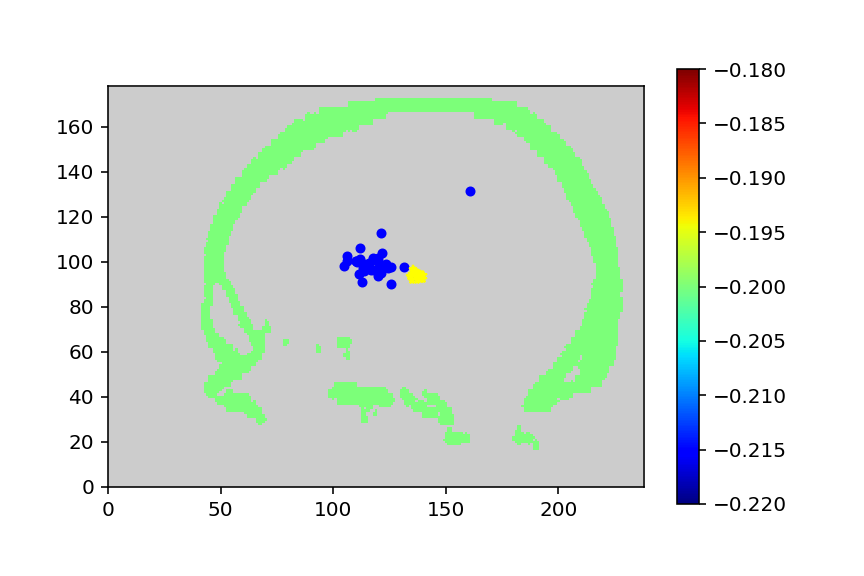

In [23]:
%matplotlib nbagg
fig, ax = plt.subplots()
palette = plt.cm.jet
palette.set_bad(alpha=0.2)
Skull_Contour[Skull_Contour==0]= np.nan
heatmap = ax.imshow(Skull_Contour.transpose(), cmap=palette)
# matplotlib.pyplot.arrow(x, y, dx, dy,head_width=4)
# matplotlib.pyplot.arrow(x, y, dx, dy,head_width=4)

# Plot centroids of MPS:
for i in centroidMPS_list:
#     matplotlib.pyplot.arrow(x, y, i[0], i[1],head_width=3,color = 'red')
#     plt.plot([x], [y], marker='o', markersize=4, color="blue")
    plt.plot(i[0], i[1], marker='o', markersize=4, color="blue")

# Plot centroids of brain:
for i in range(len(brain_mask)):
#     matplotlib.pyplot.arrow(x, y, i[0], i[1],head_width=3,color = 'red')
#     plt.plot([x], [y], marker='o', markersize=4, color="blue")
    plt.plot(brain_mask['coor_y'][i], brain_mask['coor_z'][i], marker='*', markersize=4, color="yellow")
# white towards centroid of MPS deviation
# green towards max MPS point
# matplotlib.pyplot.arrow(x, y, wx, wy,head_width=5,color = 'green')



# heatmap = ax.imshow(lesion_contour.transpose(), cmap=palette)
# heatmap = ax.pcolor(brain_diff==0, cmap=plt.cm.winter)
plt.ylim(0, Skull_Contour.shape[1])
plt.xlim (0,Skull_Contour.shape[0])
# ax.set_aspect(ConstPixelSpacing[2]/ConstPixelSpacing[1])
plt.colorbar(heatmap)
plt.show()
# plt.ion()